In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data= pd.read_csv('magaza_yorumlari_duygu_analizi.csv' ,encoding="utf-16")

In [ ]:
data.head()

,Görüş,Durum
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",Olumsuz
1,hizli teslimat tesekkürler,Tarafsız
2,ses olayı süper....gece çalıştır sıkıntı yok.....,Olumlu
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,Olumsuz
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,Olumsuz


In [ ]:
eksik_veri_sayisi = data.isnull().sum()

In [ ]:
eksik_veri_sayisi

Görüş    3
Durum    0
dtype: int64

In [ ]:
data=data.dropna()

In [ ]:
data.head()

,Görüş,Durum
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",Olumsuz
1,hizli teslimat tesekkürler,Tarafsız
2,ses olayı süper....gece çalıştır sıkıntı yok.....,Olumlu
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,Olumsuz
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,Olumsuz


In [ ]:
data.columns

Index(['Görüş', 'Durum'], dtype='object')

In [ ]:
data["Durum"].value_counts()

Durum
Olumlu      4252
Olumsuz     4237
Tarafsız    2937
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

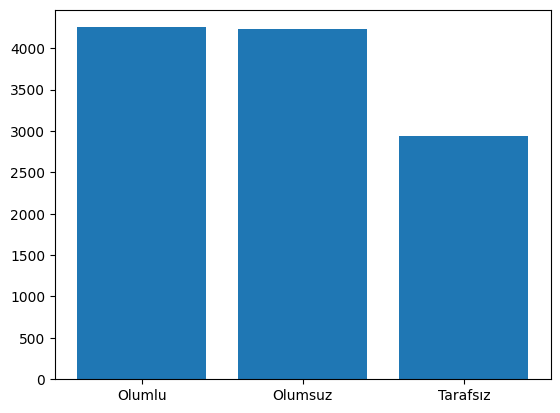

In [ ]:
durum_sayilari = data["Durum"].value_counts()
plt.bar(durum_sayilari.index,durum_sayilari.values)
plt.show

In [ ]:
data["Durum"]=data.loc[:,"Durum"].map({"Olumlu":0,"Olumsuz":1,"Tarafsız":2})

In [ ]:
data.head()

,Görüş,Durum
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",1
1,hizli teslimat tesekkürler,2
2,ses olayı süper....gece çalıştır sıkıntı yok.....,0
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,1
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,1


In [ ]:
data["Görüş"][4]

"Kulaklığın sesi kaliteli falan değil. Aleti öve öve bitiremeyen yorumlar şüpheli. Tizler yok gibi ve olan da boğuk çıkıyor. Bas, kaba saba, ben buradayım diyor ama kalite yok. İyi ses arayanlara tavsiye etmem. Hayatımda aldığım ilk Snopy marka üründü, onu da bazı yorumlara güvenerek aldım ve pişman oldum. Hepsiburada'nın sahte yorumlara karşı önlem alması gerekiyor artık."

In [ ]:
import re
cumle0=data["Görüş"][4]
cumle1=re.sub(r'[^a-zA-ZüÜöÖşŞİıçÇğĞ]',' ',cumle0)
cumle1

'Kulaklığın sesi kaliteli falan değil  Aleti öve öve bitiremeyen yorumlar şüpheli  Tizler yok gibi ve olan da boğuk çıkıyor  Bas  kaba saba  ben buradayım diyor ama kalite yok  İyi ses arayanlara tavsiye etmem  Hayatımda aldığım ilk Snopy marka üründü  onu da bazı yorumlara güvenerek aldım ve pişman oldum  Hepsiburada nın sahte yorumlara karşı önlem alması gerekiyor artık '

In [ ]:
cumle2=cumle1.lower()
cumle2

'kulaklığın sesi kaliteli falan değil  aleti öve öve bitiremeyen yorumlar şüpheli  tizler yok gibi ve olan da boğuk çıkıyor  bas  kaba saba  ben buradayım diyor ama kalite yok  i̇yi ses arayanlara tavsiye etmem  hayatımda aldığım ilk snopy marka üründü  onu da bazı yorumlara güvenerek aldım ve pişman oldum  hepsiburada nın sahte yorumlara karşı önlem alması gerekiyor artık '

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
cumle3=nltk.word_tokenize(cumle2)
cumle3

['kulaklığın',
 'sesi',
 'kaliteli',
 'falan',
 'değil',
 'aleti',
 'öve',
 'öve',
 'bitiremeyen',
 'yorumlar',
 'şüpheli',
 'tizler',
 'yok',
 'gibi',
 've',
 'olan',
 'da',
 'boğuk',
 'çıkıyor',
 'bas',
 'kaba',
 'saba',
 'ben',
 'buradayım',
 'diyor',
 'ama',
 'kalite',
 'yok',
 'i̇yi',
 'ses',
 'arayanlara',
 'tavsiye',
 'etmem',
 'hayatımda',
 'aldığım',
 'ilk',
 'snopy',
 'marka',
 'üründü',
 'onu',
 'da',
 'bazı',
 'yorumlara',
 'güvenerek',
 'aldım',
 've',
 'pişman',
 'oldum',
 'hepsiburada',
 'nın',
 'sahte',
 'yorumlara',
 'karşı',
 'önlem',
 'alması',
 'gerekiyor',
 'artık']

In [ ]:
cumle4=[w for w in cumle3 if w not in nltk.corpus.stopwords.words('turkish')]
cumle4

['kulaklığın',
 'sesi',
 'kaliteli',
 'falan',
 'değil',
 'aleti',
 'öve',
 'öve',
 'bitiremeyen',
 'yorumlar',
 'şüpheli',
 'tizler',
 'yok',
 'olan',
 'boğuk',
 'çıkıyor',
 'bas',
 'kaba',
 'saba',
 'ben',
 'buradayım',
 'diyor',
 'kalite',
 'yok',
 'i̇yi',
 'ses',
 'arayanlara',
 'tavsiye',
 'etmem',
 'hayatımda',
 'aldığım',
 'ilk',
 'snopy',
 'marka',
 'üründü',
 'onu',
 'yorumlara',
 'güvenerek',
 'aldım',
 'pişman',
 'oldum',
 'hepsiburada',
 'nın',
 'sahte',
 'yorumlara',
 'karşı',
 'önlem',
 'alması',
 'gerekiyor',
 'artık']

In [ ]:
len(cumle3)

57

In [ ]:
len(cumle4)

50

In [ ]:
stopwords.words('turkish')

['acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'çok',
 'çünkü',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'eğer',
 'en',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'için',
 'ile',
 'ise',
 'kez',
 'ki',
 'kim',
 'mı',
 'mu',
 'mü',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niçin',
 'niye',
 'o',
 'sanki',
 'şey',
 'siz',
 'şu',
 'tüm',
 've',
 'veya',
 'ya',
 'yani']

In [ ]:
cumle5=" ".join(cumle4)
cumle5

'kulaklığın sesi kaliteli falan değil aleti öve öve bitiremeyen yorumlar şüpheli tizler yok olan boğuk çıkıyor bas kaba saba ben buradayım diyor kalite yok i̇yi ses arayanlara tavsiye etmem hayatımda aldığım ilk snopy marka üründü onu yorumlara güvenerek aldım pişman oldum hepsiburada nın sahte yorumlara karşı önlem alması gerekiyor artık'

In [ ]:
def harfdegistir(cumle):
    cumle=re.sub(r'[^a-zA-ZüÜöÖşŞİıçÇğĞ]',' ',cumle)
    cumle=cumle.lower()
    cumle=nltk.word_tokenize(cumle)
    cumle=[w for w in cumle if w not in nltk.corpus.stopwords.words('turkish')]
    cumle=" ".join(cumle)
    return cumle

In [ ]:
len(data["Görüş"])

11426

In [ ]:
x=data["Görüş"].values

In [ ]:
x

array(["ses kalitesi ve ergonomisi rezalet, sony olduğu için aldım ama 4'de 1 fiyatına çin replika ürün alsaydım çok çok daha iyiydi, kesinlikle tavsiye etmiyorum.",
       'hizli teslimat tesekkürler',
       'ses olayı süper....gece çalıştır sıkıntı yok.....kablo uzun işinizi çok rahat ettirir.....çekme olayı son derece güzel içiniz rahat olsun......diğerlerini saymıyorum bile.....',
       ...,
       'bu cihazı 1 yıldır kullanıyorum cihazı çok beğenerek aldım. fakat memnun kalmadm çok ses çıkarıyor sanki evde yayık cihazı çalışıyor . kıyafetleri de normal yıkıyor öyle etkileyici bı performansı yok .',
       'Bir sene olmadı ayar düğmesine basıyorum ekran gidip geliyor',
       'Urun kaliteli zamaninda tedlimat ve kullanisli köpüğü bol. Tesekkurler evidea.'],
      dtype=object)

In [ ]:
son_gorus=[]
for i in range(len(x)):
    x1=harfdegistir(x[i])
    son_gorus.append(x1)

In [ ]:
son_gorus[125]

'ürün önce elime geçti buradan aldım kargoyu zamanında yolladıkları teşekkür ediyorum ürün hayal kırıklığı pişman oldum malzeme kalitesi bana göre iyi değil çekiş gücü süpürdüğünü bile farketmiyorum diyeceğim kadar komşumun w süpürgesi bundan güzel çektiğini söyleyebilirim yorumlara bakarak ürünümün arızalı oldugunu bile düşünüyorum yinede tavsiye etmiyorum'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
max_features=2500
vectorizer=CountVectorizer(max_features=max_features,stop_words=stopwords.words('turkish'))
space_matrix=vectorizer.fit_transform(son_gorus).toarray()

In [ ]:
print("en sık kullanılan kelimeler"), max_features, vectorizer.get_feature_names_out()

en sık kullanılan kelimeler


(None,
 2500,
 array(['acayip', 'acil', 'adam', ..., 'şöyle', 'şükür', 'şık'],
       dtype=object))

In [ ]:
space_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x= space_matrix
y= data.iloc[:,1].values

In [ ]:
data.head()

,Görüş,Durum
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",1
1,hizli teslimat tesekkürler,2
2,ses olayı süper....gece çalıştır sıkıntı yok.....,0
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,1
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
ypred=lr.predict(x_test)

In [ ]:
ypred

array([2, 2, 2, ..., 0, 1, 2])

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ypred)
cm

array([[694,  61,  94],
       [ 78, 598, 171],
       [168, 191, 231]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred)

0.6662292213473315

In [ ]:
def giris_cumlesi_siniflandir(cumle):
    temiz_cumle=harfdegistir(cumle)
    vector=vectorizer.transform([temiz_cumle]).toarray()
    tahmin=lr.predict(vector)

    if tahmin==0:
        print("Olumlu")
    elif tahmin==1:
        print("Olumsuz")
    else:
        print("Tarafsız")

In [ ]:
ornek_cumle="Güzel işletme.Temizlik konusunda çok titizler.Bu benim hoşuma gitti.Ufak bir sorunumuz oldu.Hemen ilgilendiler.Jakuzili odada konakladık.Tavsiye ederim.Onlara da ailelerin kalabileceği bir otel yaptıkları için teşekkür ederim."

In [ ]:
giris_cumlesi_siniflandir(ornek_cumle)

Olumlu
